### [GitHub url] https://github.com/SeungAh-Yoo99/DeepLearning

# Load packages

In [1]:
import torch
import torch.nn as nn
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

# MNIST train, test dataset 가져오기

In [2]:
# "": 현재 폴더에 MNIST 있음: 현재 폴더에 MNIST 있음
mnist_train = dset.MNIST("", train=True, transform=transforms.ToTensor(), target_transform=None, download=True) # train 용으로 쓰겠다.
mnist_test = dset.MNIST("", train=False, transform=transforms.ToTensor(), target_transform=None, download=True) # test 용으로 쓰겠다.

# 대략적인 데이터 형태

mnist_train 길이: 60000
mnist_test 길이: 10000
image data 형태: torch.Size([1, 28, 28])
label: 5


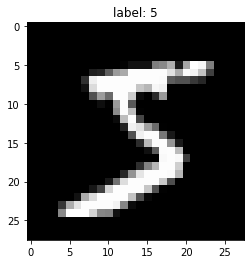

In [3]:
print ("mnist_train 길이: {}".format(len(mnist_train)))
print ("mnist_test 길이: {}".format(len(mnist_test)))

# 데이터 하나 형태
image, label = mnist_train.__getitem__(0) # 0번째 데이터
print ("image data 형태: {}".format(image.size()))
print ("label: {}".format(label))

# 그리기
image = image.numpy() # imgae 타입을 numpy 로 변환 (1, 28, 28)
plt.title("label: %d" %label)
plt.imshow(image[0], cmap='gray')
plt.show()

# MNIST data 띄워보기

5
torch.Size([1, 28, 28])
5


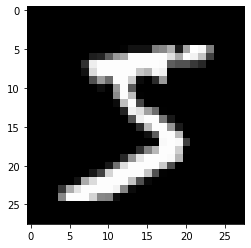

0


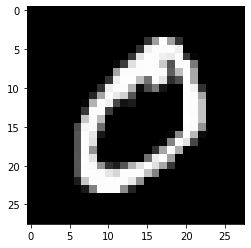

4


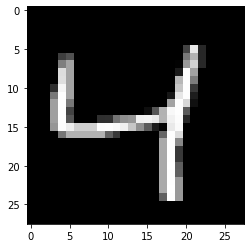

In [4]:
print(mnist_train[0][1]) # label
print(mnist_train[0][0].size()) # image

for i in range(3):
    img = mnist_train[i][0].numpy()
    print(mnist_train[i][1])
    plt.imshow(img[0], cmap='gray')
    plt.show()

# convolution 하나 씌워보기

torch.Size([1, 1, 28, 28])
5
torch.Size([1, 3, 28, 28])


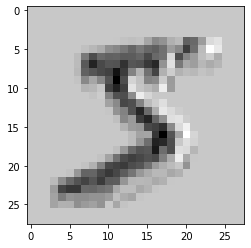

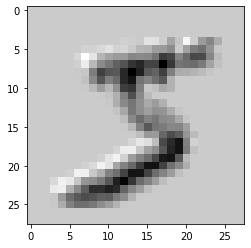

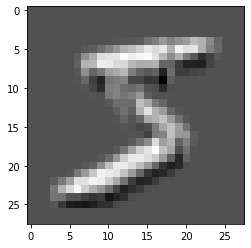

In [5]:
# mnist의 첫 번째 이미지, 라벨 가져오기
image, label = mnist_train[0]
# view: tensor의 사이즈 조절, -1: 해당 차원을 차원 확장시켜라
# [1, 28, 28] -> [1, 1, 28, 28]
image = image.view(-1, image.size()[0], image.size()[1], image.size()[2])
print(image.size())

print (label)

# convolutional filter 정의
conv_layer = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=3, padding=1)
# image에 filter 적용
output = conv_layer(Variable(image))
print(output.size())

for i in range(3):
    plt.imshow(output[0,i,:,:].data.numpy(), cmap='gray')
    plt.show()

# CNN 만들기

## train, test data 가져오기

In [6]:
import numpy as np
import torch.optim as optim

batch_size = 16
learning_rate = 0.0002
num_epoch = 10 # 1000

In [7]:
# 후에 학습시킬 때 batch_size 단위로 학습시켜나감
train_loader = torch.utils.data.DataLoader(list(mnist_train)[:batch_size*100], batch_size=batch_size, # mnist_train을 트레인 시켜라
                                          shuffle=True, num_workers=2,
                                          drop_last=True) # batch_size 만큼 나눌 때 나머지는 버려라
test_loader = torch.utils.data.DataLoader((mnist_train), batch_size=batch_size,
                                          shuffle=False, num_workers=2,
                                          drop_last=True)

# CNN 클래스 만들기 (모델 만들기)

In [9]:
class CNN(nn.Module): # nn.Module 상속받음
    def __init__(self):
        super(CNN, self).__init__() # 28 x 28
        self.layer = nn.Sequential(
            nn.Conv2d(1, 16, 5, padding=2),
            nn.ReLU(),

            nn.Conv2d(16, 32, 5, padding=2), # 28 x 28
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # 28x28 -> 14x14
            
            nn.Conv2d(32, 64, 5, padding=2), # 14x14
            nn.ReLU(),
            nn.MaxPool2d(2, 2) # 14x14 -> 7x7
        )
        self.fc_layer = nn.Sequential(
            nn.Linear(64*7*7, 100),
            nn.ReLU(),
            nn.Linear(100, 10)
        )
        
    def forward(self, x):
        out = self.layer(x)
        out = out.view(batch_size, -1)
        out = self.fc_layer(out)
        return out
    
model = CNN() # .cuda()

In [12]:
# 파라미터 체크하기
for parameter in model.parameters():
    # print(parameter)
    print(parameter.shape)

torch.Size([16, 1, 5, 5])
torch.Size([16])
torch.Size([32, 16, 5, 5])
torch.Size([32])
torch.Size([64, 32, 5, 5])
torch.Size([64])
torch.Size([100, 3136])
torch.Size([100])
torch.Size([10, 100])
torch.Size([10])


In [13]:
# loss function, optimizer 선언
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# optimization

In [14]:
for i in range(num_epoch):
    for j, [image, label] in enumerate(train_loader): # batch_size 만큼
        x = Variable(image) # .cuda()
        y_ = Variable(label) # .cudat()
        
        optimizer.zero_grad() # optimizer 안에서 이전 gradient들을 초기화.
        output = model.forward(x)
        loss = loss_func(output, y_)
        loss.backward() # gradient 계산
        optimizer.step() # parameter 업데이트
        
        if j%50 == 0:
            print(loss, j, i)

tensor(2.3142, grad_fn=<NllLossBackward>) 0 0
tensor(1.7885, grad_fn=<NllLossBackward>) 50 0
tensor(0.6721, grad_fn=<NllLossBackward>) 0 1
tensor(0.3622, grad_fn=<NllLossBackward>) 50 1
tensor(0.1272, grad_fn=<NllLossBackward>) 0 2
tensor(0.3091, grad_fn=<NllLossBackward>) 50 2
tensor(0.3115, grad_fn=<NllLossBackward>) 0 3
tensor(0.2125, grad_fn=<NllLossBackward>) 50 3
tensor(0.3191, grad_fn=<NllLossBackward>) 0 4
tensor(0.1550, grad_fn=<NllLossBackward>) 50 4
tensor(0.1794, grad_fn=<NllLossBackward>) 0 5
tensor(0.4737, grad_fn=<NllLossBackward>) 50 5
tensor(0.0456, grad_fn=<NllLossBackward>) 0 6
tensor(0.0423, grad_fn=<NllLossBackward>) 50 6
tensor(0.0195, grad_fn=<NllLossBackward>) 0 7
tensor(0.0514, grad_fn=<NllLossBackward>) 50 7
tensor(0.0186, grad_fn=<NllLossBackward>) 0 8
tensor(0.0259, grad_fn=<NllLossBackward>) 50 8
tensor(0.0032, grad_fn=<NllLossBackward>) 0 9
tensor(0.0885, grad_fn=<NllLossBackward>) 50 9


In [15]:
# 모델 저장시키기
torch.save(model, 'nets/mycnn_model_%d.pkl'%(num_epoch))

/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type CNN. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [16]:
try:
    # 미리 학습시킨 네트워크의 파라미터 집합 [피클]이라 발음함.
    model = torch.load('nets/mycnn_model_10.pkl')
    print("model restored")
except:
    print("model not restored")

model restored


In [17]:
def ComputeAccr(dloader, imodel):
    correct = 0
    total = 0
    
    for j, [imgs, labels] in enumerate(dloader): # batch_size 만큼
        img = Variable(imgs) # x
        label = Variable(labels) # y
        # label = Variable(labels),cuda()
        # .cuda() : GPU 에 로드되기 위함. 만약 CPU로 설정되어 있다면 에러남
        
        output = imodel.forward(img) # forward prop.
        _, output_index = torch.max(output, 1)
        
        total += label.size(0)
        correct += (output_index == label).sum().float()
    print("Accuracy of Test Data: {}".format(100*correct/total))

In [18]:
ComputeAccr(test_loader, model)

Accuracy of Test Data: 93.92500305175781
